# Day 6 pre-class assignment: using Pandas

## Goals for this part of today's pre-class assignment

* Use Pandas to select and view subsets of data 
* Use Pandas and matplotlib to make plots

## Useful references

* The [Pandas website](http://pandas.pydata.org/)
* [10-minute Pandas Tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

## Instructions

**This should mostly be a review of what you've already seen in CMSE 201 and 202, but if you either didn't take those courses or its been a while since you worked with Pandas, this should be a nice refresher.**

[Pandas](https://pandas.pydata.org/) is a great Python tool for doing data analysis and visualization.  It is based on NumPy arrays and matplotlib, and makes it very easy to manipulate datasets by binning, filtering, and smoothing the data.  In particular, its profound advantage over working with standard NumPy arrays is that it can work easily with strings and text, whereas NumPy arrays on their own are not very good for that.

Please watch the video below (unless you don't feel like you need a Pandas refresher), work through the [10-minute Pandas Tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), and then read the text below and work through examples with the given dataset.  We'll be using Pandas extensively in class, so it's worth your time to experiment with this if you're unfamiliar with it or feeling rusty!

### Mikel Good

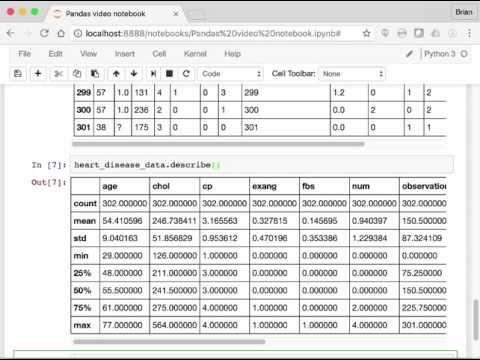

In [1]:
from IPython.display import YouTubeVideo  

# Video on the Pandas module
# Make sure to watch it in full-screen mode!

YouTubeVideo("A0InxIMAvlU",width=640,height=360)  # pandas

In [21]:
# import the pandas module
import pandas as pd

# reads in our dataset and puts it into a data frame
congress = pandas.read_csv("congress-terms.csv")

**In the cell below,** and adding additional cells if necessary, try using the various commands described in the video including head(), tail(), describe(), and making simple plots.  Note that you can also use the syntax:

`congress.columns`

to print out a list of all of the columns in the Pandas data frame.  This is useful if there are lots and lots of columns.  Try it here:

In [8]:
congress.columns

Index(['congress', 'chamber', 'bioguide', 'firstname', 'middlename',
       'lastname', 'suffix', 'birthday', 'state', 'party', 'incumbent',
       'termstart', 'age'],
      dtype='object')

In [5]:
congress.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


In [7]:
congress.tail()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1
18634,113,senate,L000123,Frank,R.,Lautenberg,NaN,1920-01-22,NJ,D,Yes,2013-01-03,93.0


In [6]:
congress.describe()

,congress,age
count,18635.000000,18635.000000
mean,96.445989,53.313732
std,9.823429,10.678469
min,80.000000,25.000000
25%,88.000000,45.400000
50%,96.000000,53.000000
75%,105.000000,60.550000
max,113.000000,98.100000


# Creating subsets of data

It's often useful to get some subset of data in a Pandas data frame.  Typical situations include:

* you want all rows in the data frame where a particular quantity is above or below a certain value
* you want a range of rows (rows 1-10, for example)
* you only want one or two of the columns

In general you then use this subset of the data for further analysis or visualization.  

In the following cells, we're going to walk you through a variety of ways of getting the data you want out of a Pandas data frame.  Note that a variety of methods for selecting data in Pandas can be [found here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) in the Pandas documentation.

To start, you can get an individual column in the data frame by using the full name of the column, like this:

    congress['state']

You can then access individual rows by 'slicing' the data in a variety of ways.  If you know the row number (they start at zero!) then you can get to it by using an index selector called `loc`, which can be used in several ways (an 'index' is a number representing a row or column in the data table).  The most straight-forward option is to just get all of the information for a single row, which can be done like so:

    congress.loc[2]
    
Remember that Pandas starts counting with a zero, so `loc[2]` is really the index for the third row.  You can also specify a range of rows using the syntax `loc[first:last]`.  To get rows 2-5, you would say:

    congress.loc[2:5]
    
Note that for the `.loc` notation, the "5" is inclusive, so we get the rows for the indices 2, 3, 4, **and** 5. This is different than the way that Python normally indexes lists or NumPy arrays.

You can also get a specific column value for an individual row by adding a second index that has the column name.  For example:

    congress.loc[2,'age']
    
returns the age for row 2.  You can also combine the things we've shown above to get a range of rows for a single column:

    congress.loc[2:5,'age']
    
Of course, as is often the case when it comes to writing code, there's more than one way to do things! We can also extract row information for a specific column like so:

    congress['age'][2:5]
    
But in this case, the "5" is **not inclusive**, so we'll only get the row information for indices 2, 3, and 4. This is equivalent to using the `iloc` notation in Pandas, which would look like this:

    congress['age'].iloc[2:5]
    
In fact, `iloc` can be used for purely integer-based indexing, and it operates similarly to NumPy array indexing. I can access the sames row for the 'age' column like this as well:

    congress.iloc[2:5,12]

Or

    congress.iloc[2:5,-1]
    
where in the second case, I'm using the fact that I know that 'age' is the last column in the dataframe.

Overwhelmed by your options yet? 

**Spend some time trying out these various methods for accessing a Pandas data frame below!**

In [10]:
# put your code here!
congress["age"]

0        85.9
1        83.2
2        80.7
3        78.8
4        78.3
         ... 
18630    75.1
18631    47.8
18632    51.5
18633    73.1
18634    93.0
Name: age, Length: 18635, dtype: float64

In [11]:
congress.loc[:5]

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3
5,80,house,G000017,James,A.,Gallagher,NaN,1869-01-16,PA,R,No,1947-01-03,78.0


In [12]:
congress["firstname"][2:5]

2     Adolph
3    Charles
4    William
Name: firstname, dtype: object

In [14]:
congress.iloc[2:5, 5]

2    Sabath
3     Eaton
4     Lewis
Name: lastname, dtype: object

# Masking data (choosing subsets based on values)

A different way of selecting information in a data frame is based on the data values.  You can create a "mask" of true and false values (which we'll learn more about soon!) by doing simple greater than/less than/equal to tests. For example, if you want to find out which rows of the column "age" have values greater than 50, you'd say:

    congress['age'] > 50

Which will return a list of true and/or false values.  You could then store this in its own variable:

    mask = congress['age'] > 50
    
and then you can use it to actually *get* a data frame containing all of the values that are greater than 50.  For example,

    congress[mask]
   
will return a data frame that contains only the rows where  "age" is greater than 50.  Note that the line above is actually equivalent to saying

    congress[congress['age'] > 50]

but this second way of saying it is harder to read.  Note that you can also use "less than" (<) or "equal to" (==) to do this sort of test, and you can also do it on strings as well as numbers!

Because the returned quantity is a data frame, you can then treat it the same way you did the original frame.  So, you can also choose to get just one column of the masked data, say the "party", by saying:

    congess[mask]['party']
    
 Which is the same thing as saying:
 
     new_data_frame = congress[mask]
     new_data_frame['party']
     
     
Note that you can create masks based on more complex boolean operations, just like you can in plain Python. You can also select random subsets of data, ranges of data, and so on.  Consult [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more information.

**Try some of these things below!**  In particular, try to get the age distribution of congresspeople from the state of Michigan (the alias for Michigan is 'MI').  Make a histogram with a non-standard number of bins.

In [30]:
import matplotlib.pyplot as plt

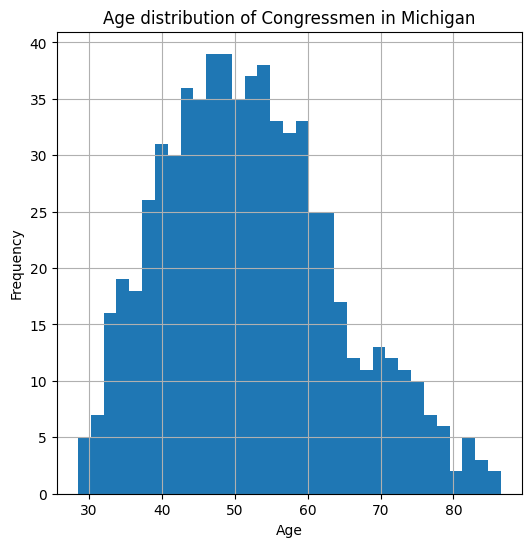

In [32]:
# put your code here!
fig = plt.figure(figsize=(6,6))
mi = congress[congress["state"] == "MI"]
mi["age"].hist(bins=33)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution of Congressmen in Michigan")
plt.show()

Finally, you can select records in a data table based on a set of values in one of the columns using the `isin()` method.  (Note: read that as "is in".  So, you can create a mask for Michigan and Illinois by giving it a list with the strings containing their state codes, like so:

    congress['state'].isin(['MI','IL'])
    
or you can use a list containing many strings or numbers:

    congress['age'].isin([50,51,52,53])
    
Once you've chosen which values you care about, you can then create a data frame with just those values:

    mask = congress['state'].isin(['MI','IL'])
    michigan_data = congress[mask]
    
Note that you can also create the list separately and then create the mask using that list.  For example:

    list_of_states = ['MI','IL']
    mask = congress['state'].isin(list_of_states)
    some_states = congress[mask]
    
is equivalent to the block of code above it.  **Give it a try** - make sure to type `some_states` at the end of the cell to see what it outputs.  Also, remember that `some_states` is a data frame, and you can treat it the same way you treated any other data frame!

In [35]:
# put your code here!
list_of_states = ["MI", "IL"]
mask = congress["state"].isin(list_of_states)
some_states = congress[mask]
some_states

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
22,80,house,H000683,Clare,Eugene,Hoffman,NaN,1875-09-10,MI,R,Yes,1947-01-03,71.3
25,80,house,W000718,Roy,Orchard,Woodruff,NaN,1876-03-14,MI,R,Yes,1947-01-03,70.8
26,80,house,B000515,William,Wallace,Blackney,NaN,1876-08-28,MI,R,Yes,1947-01-03,70.3
27,80,house,M000693,Earl,Cory,Michener,NaN,1876-11-30,MI,R,Yes,1947-01-03,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,113,house,S001179,Aaron,NaN,Schock,NaN,1981-05-28,IL,R,Yes,2013-01-03,31.6
18534,113,senate,L000261,Carl,NaN,Levin,NaN,1934-06-28,MI,D,Yes,2013-01-03,78.5
18555,113,senate,D000563,Richard,J.,Durbin,NaN,1944-11-21,IL,D,Yes,2013-01-03,68.1
18571,113,senate,S000770,Debbie,Ann,Stabenow,NaN,1950-04-29,MI,D,Yes,2013-01-03,62.7


# Plotting a Pandas data frame

Pandas has several built-in methods for creating plots, as [described here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).  You can also use the matplotplib [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) methods to create plots using slices of pandas data frames.  

The most basic type of plot you can make with Pandas is a scatter plot, where you explicitly tell Pandas which quantities are the x and y axes.

    congress.plot.scatter(x='congress',y='age')
    
This creates points of fixed size.  You can also color each point by using a third quantity in the data frame, or even re-use one of the two you're using for plotting:

    congress.plot.scatter(x='congress',y='age', 
                            c = congress['age'])
                            
Note that the syntax is somewhat different here!  You have to use a data frame or numpy array for the color of the points, because it needs a list of quantities to use for coloring.  You need to be careful about this, as it must be a number!  (Note that if you want to use text-based data, you can do so, you just need to create a new array and feed it in.)  You can also instruct it to use different color maps with the `cmap` argument.
  
You can also generate histograms of individual quantities using slices:

    congress['age'].plot.hist()
    
Note that Pandas actually uses matplotlib and pyplot, so it's possible to use all of the matplotlib histogram functionality that is shown in the [pyplot histogram documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).  So, for example, you can change the number of bins, the upper and lower range of the bins, and many other things.  So, I'm going to make a cumulative histogram with 40 bins:

    congress['age'].plot.hist(bins=40, cumulative=True)
    
**Give it a try!**

<Axes: ylabel='Frequency'>

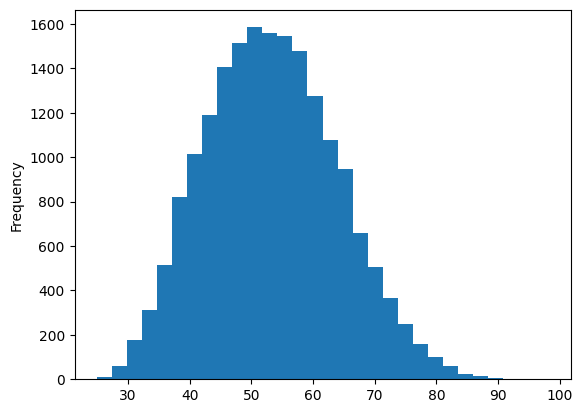

In [52]:
congress["age"].plot.hist(bins=30)

Finally, we can use matplotlib directly to make plots if we want.  I can make the same histogram as above by typing:

    plt.hist(congress['age'])
    
Or a scatter plot by typing:

    plt.scatter(x=congress['congress'],y=congress['age'])
    
Note that if you want a subset of the data, you have to make sure to explicitly use the sliced data frame when you use pyplot directly - you can't always do it within the plot method call!

You can also make many of the other plots you see in the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html).  One advantage of using pyplot directly is that you have more control over the details of the plot (axis ticks and labels, etc.); a disadvantage is that you have to be much more explicit about calling the Pandas data frame.

First, **try using the standard scatter plot and histogram, but by using pyplot instead of the Pandas routines**:

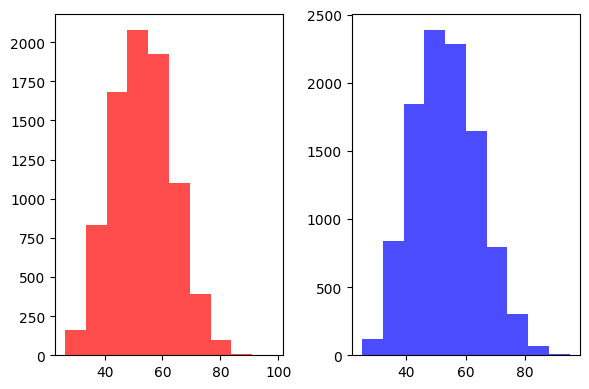

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# put your code here!
fig = plt.figure(figsize=(6,4))
R = congress[congress["party"] == "R"]
D = congress[congress["party"] == "D"]

plt.subplot(1, 2, 1)
plt.hist(R["age"], color="red", alpha=0.7)

plt.subplot(1, 2, 2)
plt.hist(D["age"], color="blue", alpha=0.7)

plt.tight_layout()
fig.show()

Now, look in the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and try to figure out a new type of plot to make with the Congress data.  **Add that plot below!**

In [ ]:
# put your code here!
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

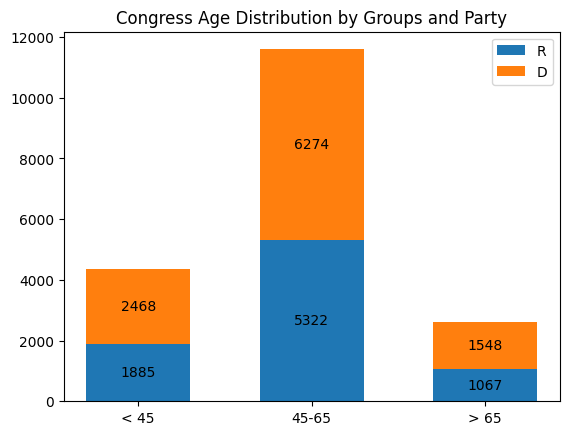

In [63]:
groups = ('< 45', '45-65', '> 65')

def group_counts(series):
    und_45 = 0
    between = 0
    over_45 = 0
    for age in series:
        if age < 45:
            und_45 += 1
        elif age >= 45 and age <= 65:
            between += 1
        else:
            over_45 += 1
    return np.array([und_45, between, over_45])

counts = {
    'R': group_counts(R["age"]),
    'D': group_counts(D["age"]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for party, ages in counts.items():
    p = ax.bar(groups, ages, width, label=party, bottom=bottom)
    bottom += ages

    ax.bar_label(p, label_type='center')

ax.set_title('Congress Age Distribution by Groups and Party')
ax.legend()

plt.show()

# Extracting data into Numpy arrays

It is also possible to extract one or more columns of a Pandas dataframe into a Numpy `ndarray` (the standard array type in numpy).  You can do this using the Pands [to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html) method, and can give it one or more columns.  For example, this extracts just the ages:

    ages = congress['age'].to_numpy()

And if you look at the type of the returned object, it should be a numpy array:

    type(ages)
    
**Try this below!**

In [58]:
# put your code here!
ages = congress["age"].to_numpy()
type(ages)

numpy.ndarray

In [59]:
ages

array([85.9, 83.2, 80.7, ..., 51.5, 73.1, 93. ], shape=(18635,))

## Congratulations, you're done!

Submit this assignment by committing it to the Git repository where you found it.  See you in class!